In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# 1: Background of the Business problem
    a):The Portuguese Bank runs direct Marketing campaigns through phone calls to convince customers to subscribe to a term deposit product.
    
    b):These campaigns occur regularly(2008-2010) and involve calling thousands of customers to check their interset    


# 2: Current Problems Face by the bank:

1):Very Low Covergence Rate: Only about 11% of customers subscribe to the term deposit.

      y
no     88.734583

yes    11.265417

That Means:
For every 100 calls ~ 89 calls fail

-This means marketing team makes almost 9 unsuccessful calls for every 1 successful sale.

-This drastically increases manpower usage,call duration and operational cost.  






2:) Unsuccessful call duration and Time:
 
   -The Dataset shows that a very large number of calls were made to customers who eventually said no to banking offer.   
     When we calculate the total duration of these unsuccessful calls:
     
      Total unsuccessful minutes :134523(minutes)
      = 2,242 hours
      = 93 days of non-stop calling
      
 This means the organization invested huge time and resources in calls that did not convert into sales
This leads to:
. 89% calling wasted.
. 80,000+minutes of unsuccessful calls.
since the marketing cost is high but successful conversion are low,that lead to the ROI(Return on investment) will become very low

In [64]:
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [65]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [66]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [67]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [69]:
df.shape

(41188, 21)

In [70]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [71]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [72]:
duplicates = df.duplicated().sum()
print("Duplicates Rows:",duplicates)

Duplicates Rows: 12


In [73]:
df = df.drop_duplicates()

In [74]:
df.shape

(41176, 21)

In [75]:
df['y'].value_counts(normalize=True) * 100

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

In [76]:
total_unsuccessful_minutes = df[df['y']=='no']['duration'].sum() / 60
total_unsuccessful_minutes

np.float64(134497.61666666667)

In [77]:
# check unknown
for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}:{sum(df[col] == 'unknown')}")

job:330
marital:80
education:1730
default:8596
housing:990
loan:990
contact:0
month:0
day_of_week:0
poutcome:0
y:0


In [78]:
# fix special varibale - pdays =999
df['pdays_not_contacted'] = np.where(df['pdays'] == 999,0,1)
# Replace 999 with Nan for modeling
df['pdays'] =df['pdays'].replace(999,np.nan)
df[['pdays', 'pdays_not_contacted']].head()

C:\Users\putva\AppData\Local\Temp\ipykernel_18112\411595829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays_not_contacted'] = np.where(df['pdays'] == 999,0,1)
C:\Users\putva\AppData\Local\Temp\ipykernel_18112\411595829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays'] =df['pdays'].replace(999,np.nan)


pdays  pdays_not_contacted
0    NaN                    0
1    NaN                    0
2    NaN                    0
3    NaN                    0
4    NaN                    0

In [79]:
numeric_cols = []
for col in df.columns:
    if df[col].dtype != object:
        numeric_cols.append(col)
print(numeric_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_not_contacted']


In [80]:
%matplotlib inline

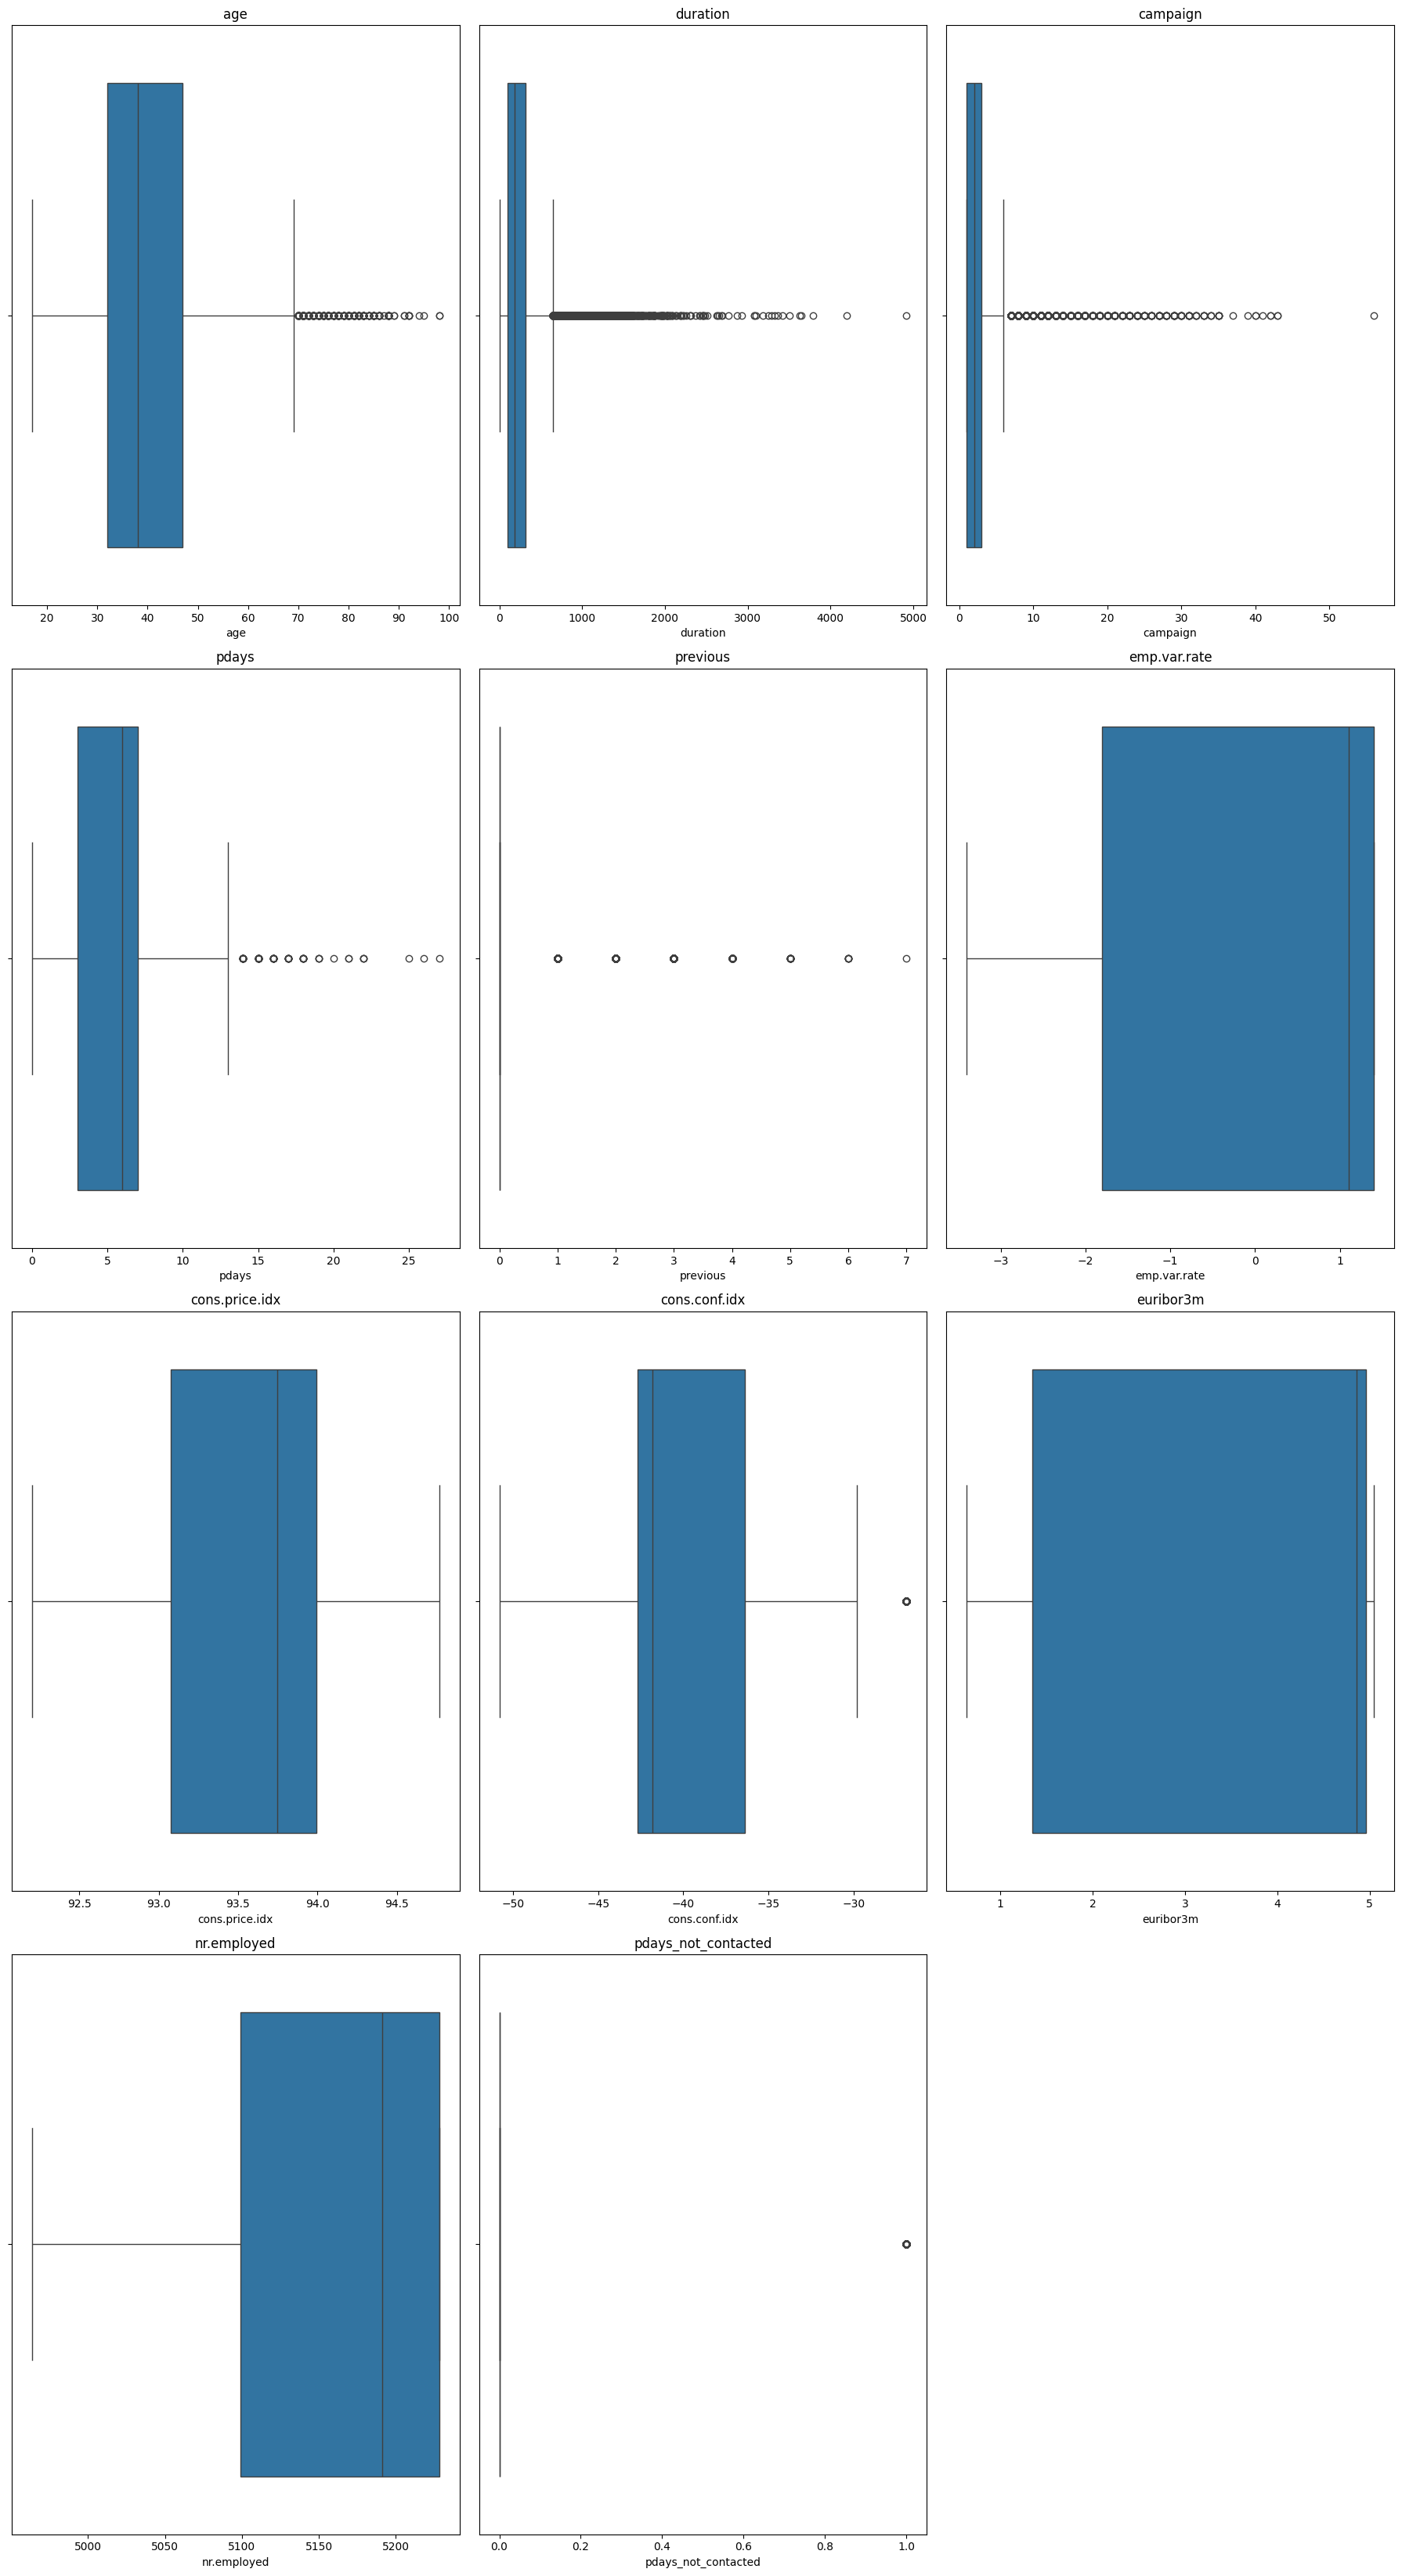

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = numeric_cols   # your numerical column list
n = len(num_cols)

plt.figure(figsize=(18, n * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot((n // 3) + 1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


## Analysis of above box plot:
- Age shows a few mild outliers(e.g.,customers above 80 years) This values are still realistic and not errors ,so no need for removal

- Duration:The Duration variable shows extreme outliers ,with values reaching above 5000 seconds. Longer calls often happens when customers are interested. But duration is Not usable for reliastic prediction Duration should not be used in prediction:Because duration is only known after the call ends -The goal of our ML model is predict whether a customer will subscribe before calling. them. -But call duration is only known after the call is completed. Hence duration is data leakage feature.

- Campaign = number of contacts made during this campaign. outliers appear(approx 18% customers contaced more than 25 times) -This are valid values should be kept

- Economic indicators(emp.var.rate, price index, confidence index, euribor3m, nr.employed) are stable, continuous data and naturally fall within a narrow range.

In [82]:
profile = ProfileReport(df, title="Data Profiling Report", explorative=True)

In [83]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 14.57it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA Report Analysis:
- pdays:96.3% missing : Create binary pdays_not_contacted,drop original.
- previous :86.3% zeros so highly imbalanced but it realistic so keep original
- housing/loan:Highly correlated so for linear model we will keep one for linear model,and we can use both for tree based model.
- default : Extremely imbalanced
  
            no - 79%
            unknown - 20%
            yes - <0.1%
  
using it may add noise or increase model complexity without improving performance ,so Drop the default from the model
- Loan : Slightly imbalanced ,keep as binary feature.

In [84]:
df = df.drop(columns=['default'])

In [85]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays_not_contacted'],
      dtype='object')

In [86]:
from scipy.stats import chi2_contingency

categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome']


print("Chi-Square Test Results:")
for col in categorical_columns:
    contingency = pd.crosstab(df[col], df['y'])
    chi2, pval, _, _ = chi2_contingency(contingency)
    print(f"{col} --- p-value: {pval}")

Chi-Square Test Results:
job --- p-value: 3.2684116066165443e-199
marital --- p-value: 1.7784225004611415e-26
education --- p-value: 3.746768377534744e-38
housing --- p-value: 0.056637927494525425
loan --- p-value: 0.5771532081176227
contact --- p-value: 1.7187406241263767e-189
month --- p-value: 0.0
day_of_week --- p-value: 3.085754965631742e-05
poutcome --- p-value: 0.0


In [87]:
# Drop categorical features that are NOT statistically significant
df = df.drop(['housing', 'loan'], axis=1)

In [88]:
df = df.drop(['pdays'],axis=1)

In [89]:
numeric_cols = []
for col in df.columns:
    if df[col].dtype != object:
        numeric_cols.append(col)
print(numeric_cols)

['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_not_contacted']


In [90]:
# # VIF(Variance Inflation Factor)  Sequentially check
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = df[numeric_cols]
# total_columns = vif_data.shape[1]
# columns_to_be_kept = []
# column_index = 0


# for i in range (0,total_columns):

#     vif_value = variance_inflation_factor(vif_data, column_index)
#     print(column_index,'---',vif_value)

#     if vif_value <= 6:
#         columns_to_be_kept.append(numeric_cols[i])
#         column_index = column_index+1
#     else:
#         vif_data = vif_data.drop([ numeric_cols[i] ], axis=1)

In [91]:
from scipy.stats import f_oneway

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("ANOVA Test Results:\n")

for col in numeric_cols:
    groups = []

    # Separate each unique group of target values
    for value in df['y'].unique():
        groups.append(df[df['y'] == value][col])

    # Perform ANOVA
    stat, pval = f_oneway(*groups)

    print(f"{col} --- p-value: {pval}")


ANOVA Test Results:

age --- p-value: 7.003243845684908e-10
duration --- p-value: 0.0
campaign --- p-value: 2.0434309097339834e-41
previous --- p-value: 0.0
emp.var.rate --- p-value: 0.0
cons.price.idx --- p-value: 1.6222328681832698e-169
cons.conf.idx --- p-value: 9.132175774550133e-29
euribor3m --- p-value: 0.0
nr.employed --- p-value: 0.0
pdays_not_contacted --- p-value: 0.0


In [93]:
print(columns_to_be_kept)

['duration', 'campaign', 'previous', 'nr.employed', 'pdays_not_contacted']


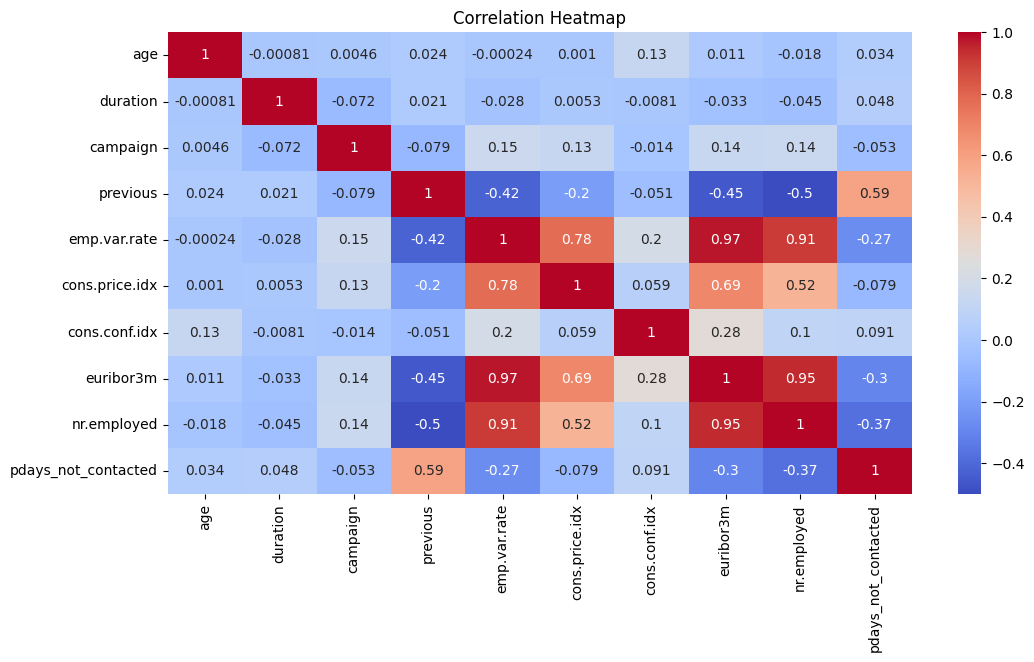

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [95]:
df = df.drop(['emp.var.rate', 'nr.employed'],axis=1)

In [96]:
final_df = df.drop(['duration'],axis=1)

In [97]:
final_df.head()

age        job  marital    education    contact month day_of_week  \
0   56  housemaid  married     basic.4y  telephone   may         mon   
1   57   services  married  high.school  telephone   may         mon   
2   37   services  married  high.school  telephone   may         mon   
3   40     admin.  married     basic.6y  telephone   may         mon   
4   56   services  married  high.school  telephone   may         mon   

   campaign  previous     poutcome  cons.price.idx  cons.conf.idx  euribor3m  \
0         1         0  nonexistent          93.994          -36.4      4.857   
1         1         0  nonexistent          93.994          -36.4      4.857   
2         1         0  nonexistent          93.994          -36.4      4.857   
3         1         0  nonexistent          93.994          -36.4      4.857   
4         1         0  nonexistent          93.994          -36.4      4.857   

    y  pdays_not_contacted  
0  no                    0  
1  no                    0  
2  no                    0  
3  no                    0  
4  no                    0

In [98]:
final_df['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [99]:
# Filter only subscribed customers
subscribed = final_df[final_df['y'] == 1]

# Define age ranges (bins)
bins = [15, 20, 30, 40, 50, 60, 70, 100]
labels = ['16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Create a new column for age range
subscribed['age_range'] = pd.cut(subscribed['age'], bins=bins, labels=labels, right=True)

# Count subscriptions by age range
age_range_counts = subscribed['age_range'].value_counts().sort_index()

print("Age-range-wise subscription count:")
print(age_range_counts)

# Find the age range with the highest subscriptions
most_subscribed_range = age_range_counts.idxmax()
max_count_range = age_range_counts.max()

print(f"\nAge range with the highest subscriptions: {most_subscribed_range} ({max_count_range} people)")


Age-range-wise subscription count:
age_range
16-20    0
21-30    0
31-40    0
41-50    0
51-60    0
61-70    0
71+      0
Name: count, dtype: int64

Age range with the highest subscriptions: 16-20 (0 people)


## Logitic Regression

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

ordinal_cols = ['education']

onehot_cols = ['job','marital','contact','month','day_of_week','poutcome']

numerical_cols = ['age','campaign','previous','cons.price.idx','cons.conf.idx','euribor3m','pdays_not_contacted']

education_categories = [['unknown','illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']]


In [101]:
preprocessor = ColumnTransformer(transformers=[('ordinal',OrdinalEncoder(categories=education_categories),ordinal_cols),
                                               ('onehot',OneHotEncoder(handle_unknown='ignore',drop='first'),onehot_cols),
                                               ('num','passthrough',numerical_cols)
                                              ]
                                )

In [102]:
preprocessor

ColumnTransformer(transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['unknown',
                                                             'illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'professional.course',
                                                             'university.degree']]),
                                 ['education']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['job', 'marital', 'contact', 'month',
                                  'day_of_week', 'poutcome']),
                                ('num', 'passthrough',
                                 ['age', 'campaign', 'previous',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'euribor3m', 'pdays_not_contacted'])])

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['y'] = le.fit_transform(final_df['y'])

# Model Pipeline
pipeline = Pipeline(steps=[('preprocessing',preprocessor),
                           ('model',LogisticRegression(max_iter=200))
                          ])

# Check the encoding
print("Classes:", le.classes_)   # Original labels
print("Encoded values:", list(range(len(le.classes_))))  # Corresponding encoded numbers

Classes: ['no' 'yes']
Encoded values: [0, 1]


In [104]:
# Split Data
X = final_df.drop('y',axis=1)
y=final_df['y']

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
# Train Model
pipeline.fit(X_train,y_train)

C:\Users\putva\anaconda3\envs\purva\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num', 'passthrough',
                                                  ['age', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'pdays_not_contacted'])])),
                ('model', LogisticRegression(max_iter=200))])

In [107]:
print('Test Score',pipeline.score(X_test,y_test))

Test Score 0.8929091792132103


In [108]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Predictions
y_pred = pipeline.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Precision: 0.6518771331058021
Recall: 0.19670442842430483

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.65      0.20      0.30       971

    accuracy                           0.89      8236
   macro avg       0.78      0.59      0.62      8236
weighted avg       0.87      0.89      0.87      8236



## XGBoost

In [109]:
from xgboost import XGBClassifier
neg,pos = y_train.value_counts()
scale = neg/pos
xgb_model = XGBClassifier(
    n_estimators = 350,
    learning_rate = 0.05,
    max_depth = 5,
    subsample = 0.9,
    colsample_bytree = 0.9,
    scale_pos_weight = 3,
    eval_mertic = 'logloss',
    random_state = 42)


In [110]:
pipeline_XGB = Pipeline(steps=[('preprocessing',preprocessor),('model',xgb_model)])

In [111]:
X=final_df.drop('y',axis=1)
y=final_df['y']

In [112]:
pipeline_XGB.fit(X_train,y_train)

C:\Users\putva\anaconda3\envs\purva\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:09:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "eval_mertic" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'pout...
                               eval_metric=None, feature_types=None,
                               feature_weights=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=350, n_jobs=None, ...))])

In [113]:
print("XGBoost Test Accuracy:", pipeline_XGB.score(X_test, y_test))

XGBoost Test Accuracy: 0.8810101991257893


In [114]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Predictions
y_pred1 = pipeline_XGB.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred1)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred1)
print("Recall:", recall)

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred1))

Precision: 0.49555774925962487
Recall: 0.5169927909371782

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7265
           1       0.50      0.52      0.51       971

    accuracy                           0.88      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.88      0.88      0.88      8236



## Logistic Regression + SMOTE

In [115]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

log_reg_SMOTE = LogisticRegression(max_iter=1000)

# ----------------------------
# SMOTE + Preprocessing + Model in a Pipeline
# ----------------------------
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),   
    ('smote', SMOTE(random_state=42)),
    ('model', log_reg_SMOTE)
])

# ----------------------------
# Train Model
# ----------------------------
pipeline_lr.fit(X_train, y_train)


C:\Users\putva\anaconda3\envs\purva\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num', 'passthrough',
                                                  ['age', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'pdays_not_contacted'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [116]:

# ----------------------------
# Predict
# ----------------------------
y_pred = pipeline_lr.predict(X_test)

# ----------------------------
# Report
# ----------------------------
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7265
           1       0.33      0.63      0.43       971

    accuracy                           0.80      8236
   macro avg       0.64      0.73      0.66      8236
weighted avg       0.87      0.80      0.83      8236



## Random Forest + SMOTE

In [117]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_rf_smote = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=250,
        max_depth=12,
        min_samples_split=4,
        random_state=42
    ))
])
pipeline_rf_smote.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num', 'passthrough',
                                                  ['age', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'pdays_not_contacted'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=12, min_samples_split=4,
                                        n_estimators=250, random_state=42))])

In [118]:
y_pred = pipeline_rf_smote.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7265
           1       0.50      0.48      0.49       971

    accuracy                           0.88      8236
   macro avg       0.71      0.71      0.71      8236
weighted avg       0.88      0.88      0.88      8236



## XGBoost + SMOTE

In [121]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from xgboost import XGBClassifier

# -------------------------------
# Split data
# -------------------------------
x = final_df.drop('y', axis=1)
y = final_df['y']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# XGBoost with scale_pos_weight
# -------------------------------
neg, pos = y_train.value_counts()
scale = neg / pos

xgb_model = XGBClassifier(
    n_estimators=350,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42
)

# -------------------------------
# Pipeline with SMOTE + Preprocessor
# -------------------------------
pipeline_xgb_smote = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', xgb_model)
])

# -------------------------------
# Fit model
# -------------------------------
pipeline_xgb_smote.fit(x_train, y_train)

# -------------------------------
# Predict probabilities
# -------------------------------
y_prob = pipeline_xgb_smote.predict_proba(x_test)[:, 1]

# Default threshold 0.5
y_pred = (y_prob >= 0.5).astype(int)

# -------------------------------
# Classification report
# -------------------------------
print("Classification Report:\n")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7308
           1       0.30      0.71      0.42       928

    accuracy                           0.78      8236
   macro avg       0.63      0.75      0.64      8236
weighted avg       0.88      0.78      0.81      8236



In [123]:
import pickle

# Save the trained pipeline
with open("xgb_smote_pipeline.pkl", "wb") as file:
    pickle.dump(pipeline_xgb_smote, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


# MODEL COMPARISON – SIMPLE & CLEAR SUMMARY
## Baseline Model – Logistic Regression

This model gives very high accuracy (89%), but that’s because the data is imbalanced.

It predicts class 0 (no subscription) extremely well, but struggles to identify class 1 (subscribers).

Precision for subscribers: 0.65

Recall for subscribers: 0.19 (very low)

- This means it finds only 19% of actual subscribers.

- Good for overall accuracy,
- Not good for marketing, because it misses most subscribers.

## Random Forest + SMOTE

SMOTE balanced the data, so the model performs better for class 1.

Precision: 0.50

Recall: 0.48

F1: 0.49

Much better at identifying potential subscribers compared to logistic regression.

Accuracy is 88%, but importantly:

It catches 48% of subscribers, more than double the baseline model.

- A balanced model with solid performance
-  Better recall and precision for subscribers than baseline
-  But still moderate performance

## XGBoost + SMOTE

Gives the highest recall (0.71) among all models.

This means it identifies 71% of actual subscribers, which is excellent for marketing campaigns.

Precision: 0.30

Recall: 0.71

F1: 0.42

Slightly lower accuracy (78%), but accuracy is not important here because data is imbalanced.

- Best model for catching potential customers
- Excellent recall → finds the maximum number of subscribers
- Lower precision → some false positives, but acceptable for marketing use-case

⭐ FINAL MEETING-READY SUMMARY (Use this directly)

“We compared three models. The baseline logistic regression gave high accuracy but very low recall for subscribers—it detected only 19% of the people who would actually subscribe. After applying SMOTE, the Random Forest model improved recall to 48% with balanced performance. Finally, XGBoost with SMOTE gave the best recall of 71%, meaning it can identify most of the potential subscribers, which is the main goal of this project. So, XGBoost is the strongest model for marketing prediction because it captures the maximum number of interested customers.”

# Final Conclusion:

Our predictive model helps the bank target customers who are more likely to subscribe to a term deposit. Earlier, the bank made many random calls, resulting in high unsuccessful call rates and low conversions.
Previously, the marketing team had to call almost every customer, leading to 89% unsuccessful calls, high manpower usage, and wasted calling hours.    
with predictive model the number of unnecessary calls is reduced by about 70%, while still capturing the majority of potential subscribers. Conversion rate improves dramatically from 11% to approximately 31%, meaning the bank now needs to contact only 26 customers instead of 100 to achieve the same or better results.
Overall, the model transforms the campaign strategy from blind calling to data-driven targeted marketing, leading to:

- 70% reduction in unsuccessful calls
- 3× improvement in conversion rate   
- This demonstrates that predictive analytics can greatly optimize marketing campaigns and help the bank focus on customers who truly matter.

## suggestion to bank to improve marketing
- These recommendations come directly from the data analysis, model insights, and business understanding of the Term Deposit marketing problem: 1:The model identifies which customers are most likely to subscribe. → So suggestions focus on targeting high-probability customers first to reduce wasted calls and increase conversion.
- We also observed behavioral patterns in the dataset—such as customer age, job type, call duration, and previous campaign outcomes—that strongly influence subscription decisions.
- Additionally, current marketing issues like high unsuccessful call rates were considered. Combining these insights with standard tele-marketing best practices, we provided suggestions that improve conversion, reduce wasted calls, and increase overall marketing efficiency.